# Изучение закономерностей, определяющих успешность игр.

## Описание проекта
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, 
выявить закономерности, определяющие успешность игры.

1. [Изучение общей информации](#Шаг-1.-Изучение-общей-информации.)
2. [Подготовка данных.](#Шаг-2.-Подготовка-данных.)
3. [Исследовательский анализ данных](#Шаг-3.-Исследовательский-анализ-данных.)
4. [Портрет пользователя каждого региона](#Шаг-4.-Портрет-пользователя-каждого-региона.)
5. [Проверка гипотез](#Шаг-5.-Проверка-гипотез.)
6. [Общий вывод](#Шаг-6.-Общий-вывод.)

### Шаг 1. Изучение общей информации.

Импортирование модулей, необходимых для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import warnings
warnings.filterwarnings('ignore')

In [2]:
def df_view(df):
    """
    Быстрый обзор таблицы
    """
    display(df)
    print(df.info())

Чтение данных и визуалиция таблицы

In [3]:
df = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


#### Вывод
Всего в нашей таблице 11 столбцов, тип данных у 5 - object (текстовые выражения) и 6 столбов имеют тип float64 (числа с плавающей точкой).

Названия столцов:
`Name` — название игры
`Platform` — платформа
`Year_of_Release` — год выпуска
`Genre` — жанр игры
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
`EU_sales` — продажи в Европе (миллионы проданных копий)
`JP_sales` — продажи в Японии (миллионы проданных копий)
`Other_sales` — продажи в других странах (миллионы проданных копий)
`Critic_Score` — оценка критиков (максимум 100)
`User_Score` — оценка пользователей (максимум 10)
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается, значит есть пропущенные значения. В названиях столцов есть заглавные буквы, поэтому требуется приведение названий к единому регистру.

Данные столбца `Year_of_Release` являются типом `float64`, требует замены на  целочисленный тип `int64`, для уменьшения размера данных и упрощения расчетов. Также мы заменим тип данных столбца `User_Score` c `object` на `float64`.

### Шаг 2. Подготовка данных.

Приведем названия столбцов к единому нижнему регистру

In [4]:
df.rename(str.lower, axis='columns', inplace=True)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим долю пропущенных значений в столбцах

In [5]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Доля пропущенных значений в колонках `name`, `year_of_release` и `genre` является крайне низкой (максимум 1,6% в колонке год выпуска), поэтому эти пропущенные значения просто удалим, на оценку данных это не повлияет.
БОльшая доля пропущенных значений NaN приходится на столбцы с рейтингами, но заменять их на что-либо нецелесообразно, поскольку любая замена будет необъективной, к тому же для дальнейшей работы по проекту в исследовании корреляций пропуски нам не будут мешать. Такое количество пропусков в рейтингах может быть связано с отсутствием доступной информации, поскольку данные были взяты из открытых источников, не все игры получают оценку или достаточное их количество. Рейтинга ESRB может также не быть, поскольку это необязательный показатель для всех стран, в основном для Америки.


In [6]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace=True)
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

В колонках с рейтингом пользователей встречается значение `tbd` - расшифровка `будет определено`. Их порядка 25%. Показалось логичным заменить эти значения на NaN. Опять же заменить их каким-либо значением будет необъективно.

In [7]:
df['user_score'].replace(to_replace='tbd', value=float('NaN'), inplace=True)
df_view(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


Выполним замены типов данных в таблице

In [8]:
df = df.astype({'year_of_release':'Int64', 'user_score':'Float64'}, errors='ignore')
df_view(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None


Подсчитаем общие продажи по всем регионам и выделим их  в отдельный столбец

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df_view(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None


#### Вывод
Обработали данные таблицы, убрали пропущенные значения в столбцах по имени, платформе и год выпуска, изменили тип данных в столбцах год выпуска и рейтинг пользователя, перевели значения  `tbd` в NaN. Подсчитали суммарные продажи во всех регионах и выделили их в отдельный столбец.

### Шаг 3. Исследовательский анализ данных.

Посмотрим, сколько игр выпускалось в разные года.

In [10]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

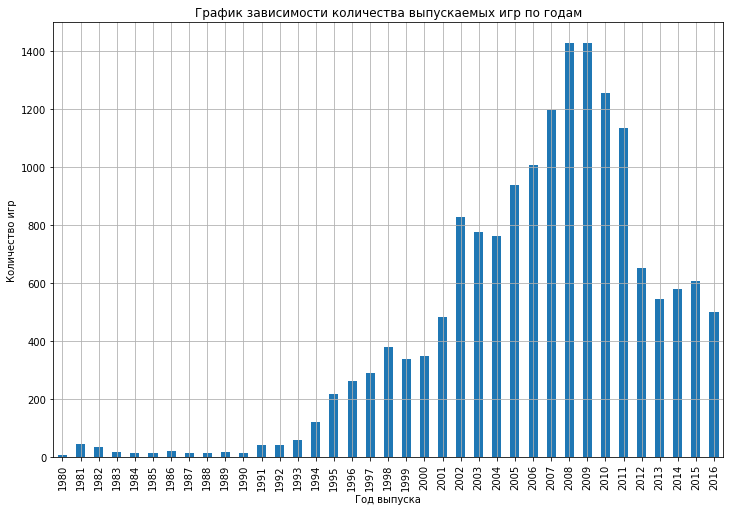

In [11]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', grid=True, figsize=(12,8))
plt.title('График зависимости количества выпускаемых игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Судя по графику активно игры начали выходить после 2000 года, пик по нашим данным пришелся на 2008-2009 год, после чего количество выпускаемых игр начало заметно снижаться, с 2012 по 2016 год количество выпускаемых игр в год близко друг к другу. Поэтому для анализа брать все данные смысла не имеет, достаточно данных с 2002 года, когда начался активный рост.
  

Посмотрим время жизни разных платформ

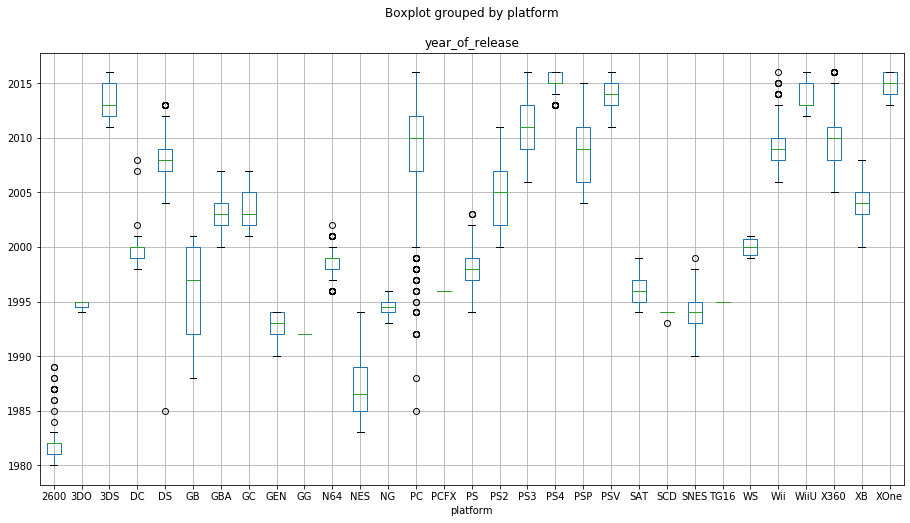

In [12]:
df.boxplot(by='platform', column='year_of_release', figsize=(15,8))

По графику видно, что для прогноза продаж на 2017 год нет смысла брать все платформы, потому что многие уже устарели. Оптимальным вариантом будет взять данные с 2002 по 2016 год, при этом мы захватим все популярные в последние годы платформы. Ниже посмотрим среднее время жизни платформ.

Выберем платформы с наибольшими суммарными продажами и проанализируем по годам.

In [13]:
pl = df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
display(pl)

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

In [14]:
sorted_pl = pl.sum(level='platform').sort_values('total_sales', ascending=False)
display(sorted_pl)
sorted_pl.columns

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Index(['total_sales'], dtype='object')

Из данных выше видны самые прибыльные платформы, посмотрим на их распределение по годам на графиках.

In [15]:
pl_list = sorted_pl.index.to_list()

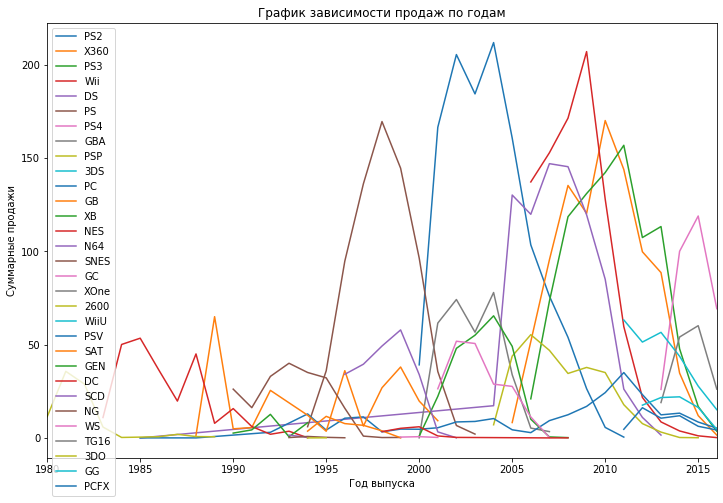

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

for i in pl_list:
    pl.loc[i].plot(y='total_sales', label=i, ax=ax, stacked=True)    
    plt.title('График зависимости продаж по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи') 
    
plt.show()    

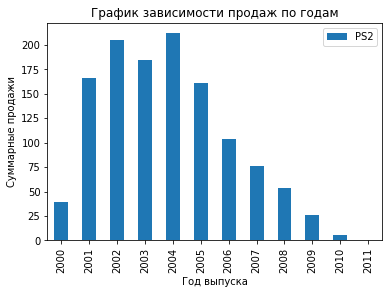

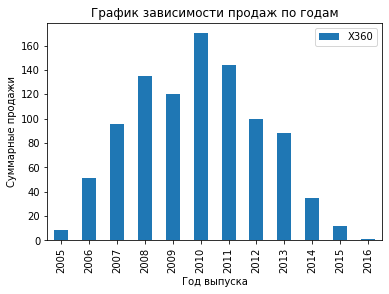

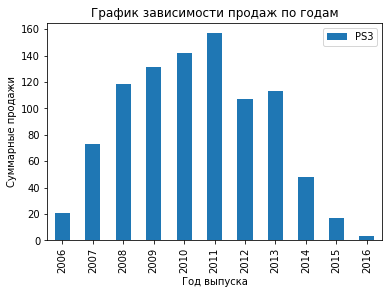

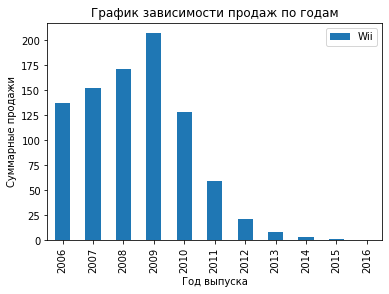

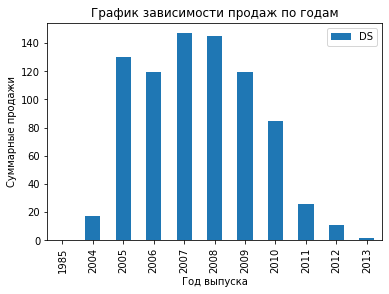

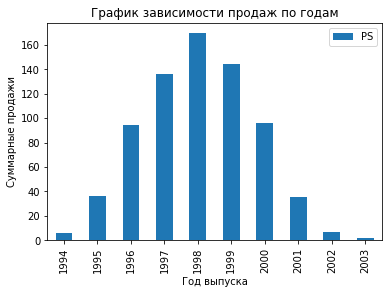

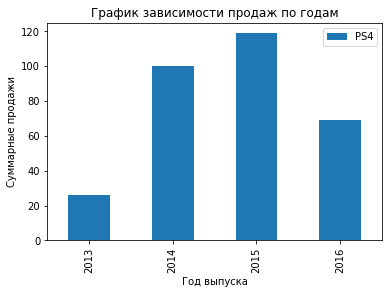

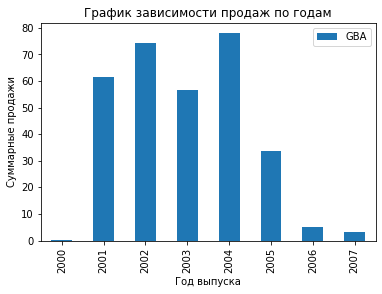

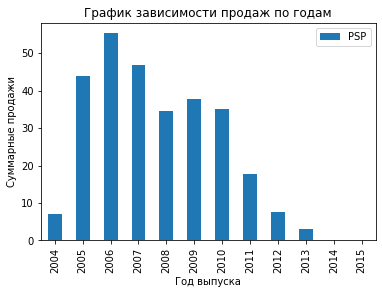

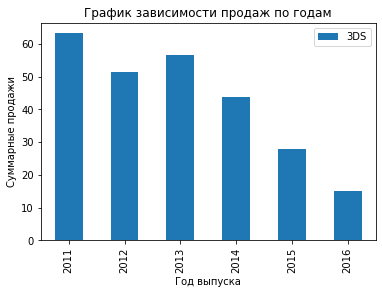

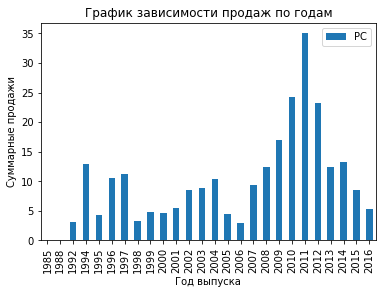

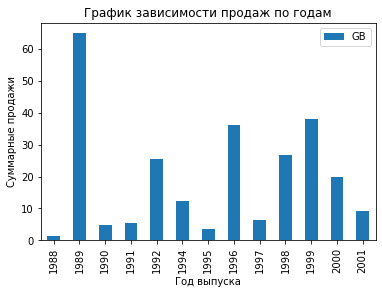

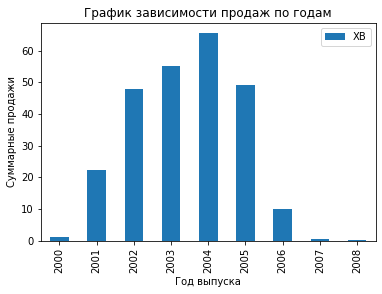

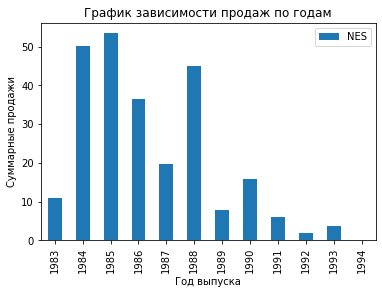

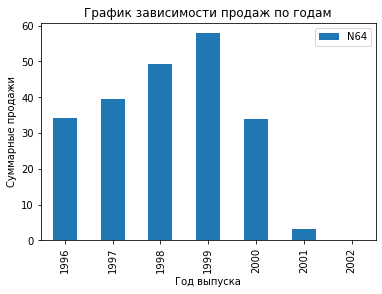

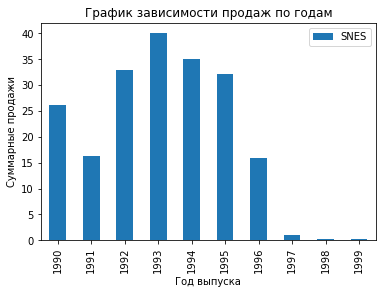

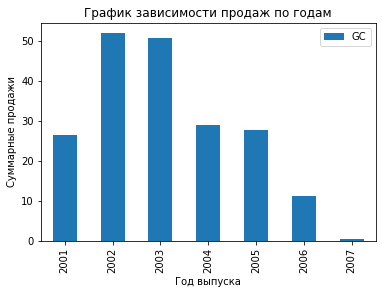

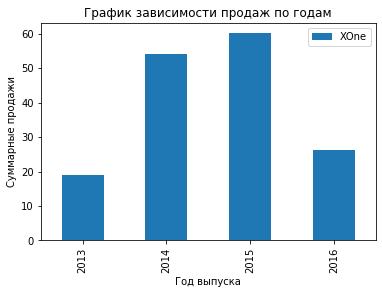

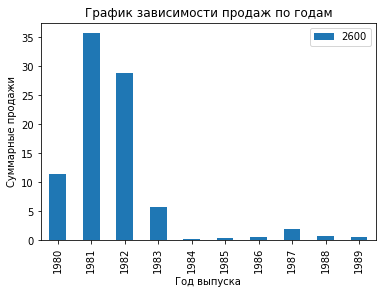

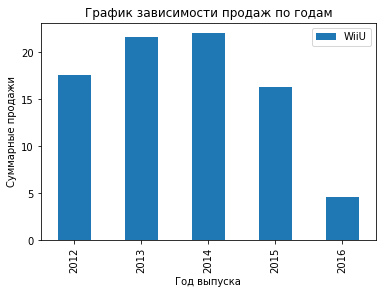

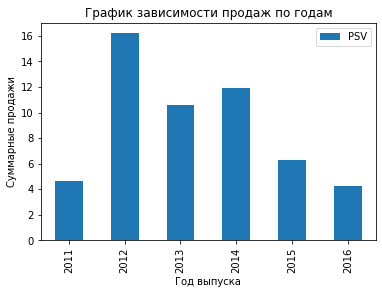

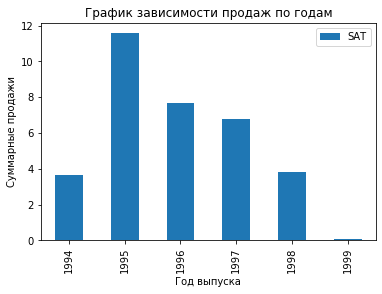

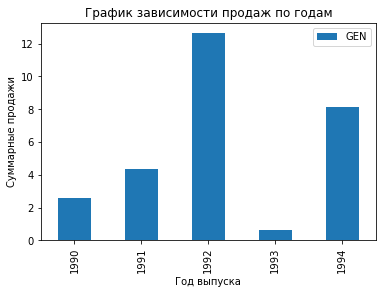

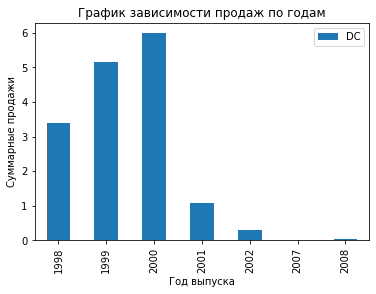

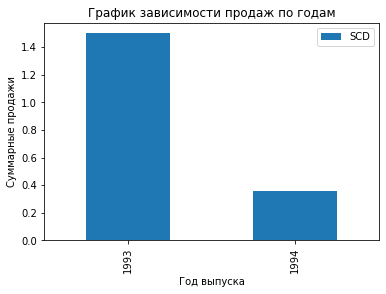

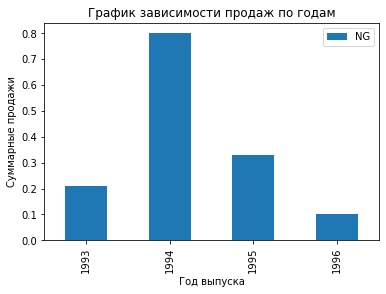

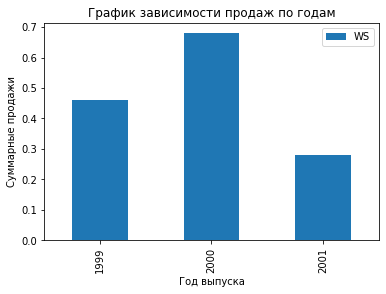

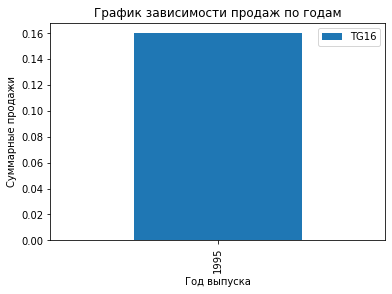

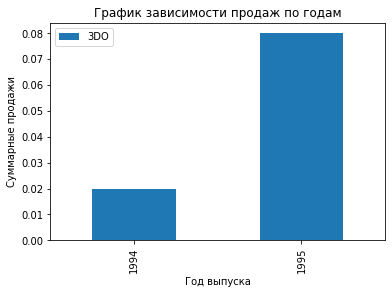

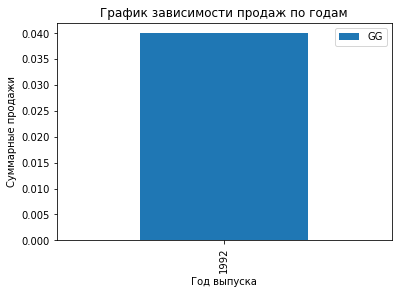

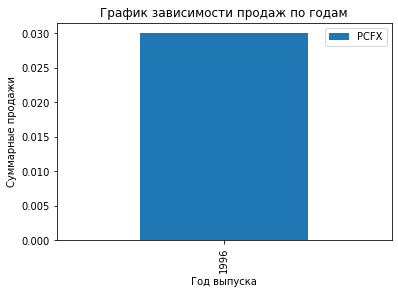

In [17]:
for i in pl_list:
    pl.loc[i].plot(y='total_sales', kind='bar', label=i)
    plt.title('График зависимости продаж по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи') 

plt.show()    

По первому графику можно увидеть, как платформы сменяют друг друга, на графиках распределения видно, что в среднем платформы живут около 10 лет и затем их сменяют другие. Ниже подсчитаем время жизни для каждой из платформ в наших данных и выведем на графике.

year_of_release       diff
                     min   max     
platform                           
2600                1980  1989    9
3DO                 1994  1995    1
3DS                 2011  2016    5
DC                  1998  2008   10
DS                  1985  2013   28
GB                  1988  2001   13
GBA                 2000  2007    7
GC                  2001  2007    6
GEN                 1990  1994    4
GG                  1992  1992    0
N64                 1996  2002    6
NES                 1983  1994   11
NG                  1993  1996    3
PC                  1985  2016   31
PCFX                1996  1996    0
PS                  1994  2003    9
PS2                 2000  2011   11
PS3                 2006  2016   10
PS4                 2013  2016    3
PSP                 2004  2015   11
PSV                 2011  2016    5
SAT                 1994  1999    5
SCD                 1993  1994    1
SNES                1990  1999    9
TG16                1995  1995    0
WS                  1999  2001    2
Wii                 2006  2016   10
WiiU                2012  2016    4
X360                2005  2016   11
XB                  2000  2008    8
XOne                2013  2016    3

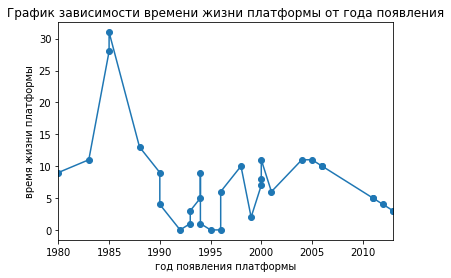

In [18]:
pl_min_max = df.groupby(['platform']).agg({'year_of_release':['min','max']})
pl_min_max['diff'] = pl_min_max[('year_of_release', 'max')] - pl_min_max[('year_of_release', 'min')]
display(pl_min_max)
fig, ax = plt.subplots()
pl_min_max.sort_values(('year_of_release', 'min')).plot(x=('year_of_release', 'min'), y='diff', ax=ax, style='o-', legend=False)
plt.title('График зависимости времени жизни платформы от года появления')
plt.xlabel('год появления платформы')
plt.ylabel('время жизни платформы')
plt.show()

Из графика видно, что начиная с 2002 года время жизни платформы не превышает 10 лет, что подтверждает правильность наших данных.

Объединим таблицу с самыми прибыльными платформами и их временем жизни в одну.

In [19]:
pl_grand = sorted_pl.merge(pl_min_max, on='platform', how='outer')
display(pl_grand)

,total_sales,"(year_of_release, min)","(year_of_release, max)","(diff, )"
platform,,,,
PS2,1233.56,2000,2011,11
X360,961.24,2005,2016,11
PS3,931.34,2006,2016,10
Wii,891.18,2006,2016,10
DS,802.78,1985,2013,28
PS,727.58,1994,2003,9
PS4,314.14,2013,2016,3
GBA,312.88,2000,2007,7
PSP,289.53,2004,2015,11


Исходя из анализа данных выше, можно сделать вывод, что характерное время жизни для платформ, которые имеют максимальные продажи составляет около 10 лет. Исключением среди продающихся является платформа DS, которая просуществовала на рынке 28 лет. Учитывая, что активное появление игр началось с 2001 года, то есть для прогноза данных на 2017 год достаточно взять предшествующий период с 2004 по 2016 год. 
Сделаем срез изначальных данных, согласно условию `year_of_release > 2004` 

In [20]:
df_sorted = df.query('year_of_release > 2004')
df_view(df_sorted)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11272 entries, 0 to 16714
Data columns (total 12 columns):
name               11272 non-null object
platform           11272 non-null object
year_of_release    11272 non-null Int64
genre              11272 non-null object
na_sales           11272 non-null float64
eu_sales           11272 non-null float64
jp_sales           11272 non-null float64
other_sales        11272 non-null float64
critic_score       5645 non-null float64
user_score         5538 non-null float64
rating             7310 non-null object
total_sales        11272 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.1+ MB
None


Проведем анализ данных в новом датафрейме с данными за 2005-2016 года. 
Выберем в оставшихся платформах максимально прибыльные.

In [21]:
df_sorted_pl = df_sorted.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
df_sorted_pl1 = df_sorted_pl.sum(level='platform').sort_values('total_sales', ascending=False)
df_sorted_pl1

,total_sales
platform,
X360,961.24
PS3,931.34
Wii,891.18
DS,785.49
PS2,426.46
PS4,314.14
PSP,282.47
3DS,257.81
PC,167.79


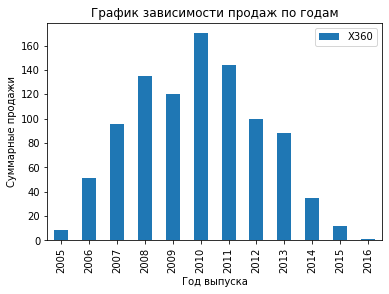

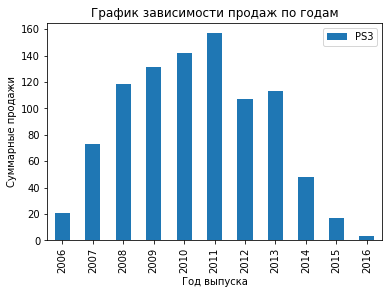

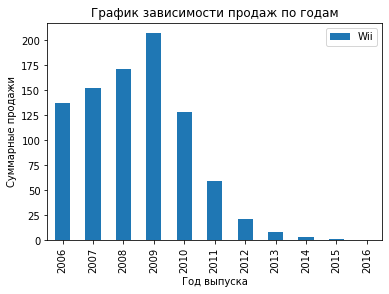

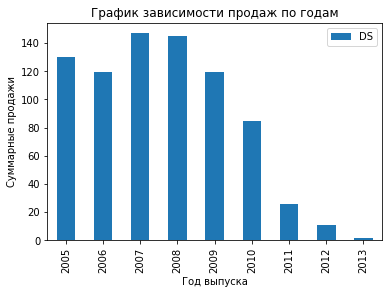

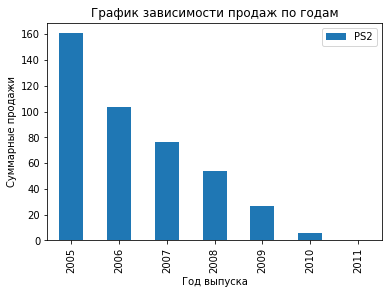

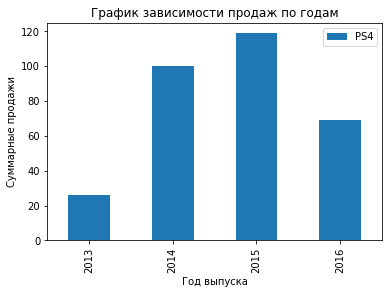

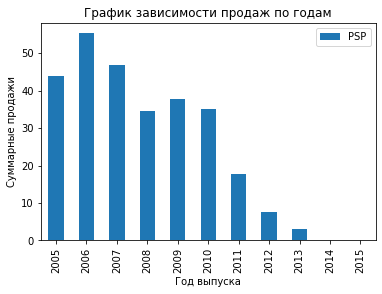

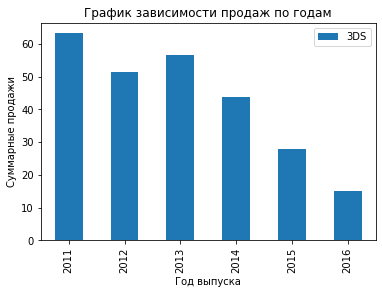

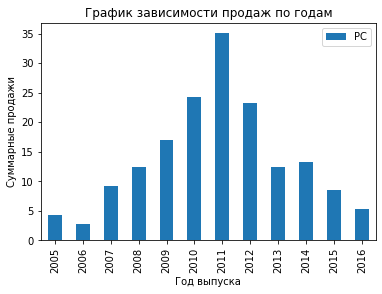

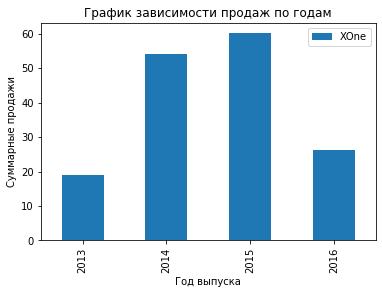

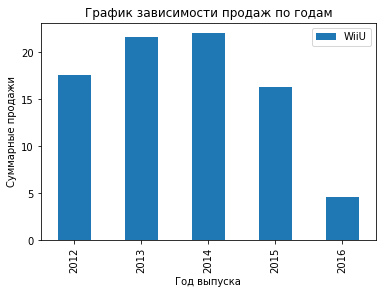

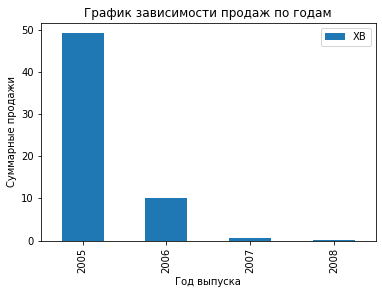

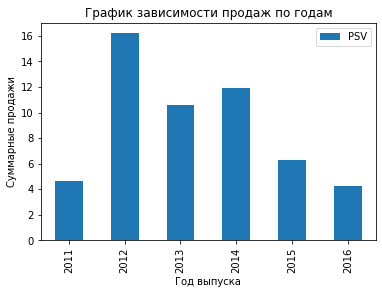

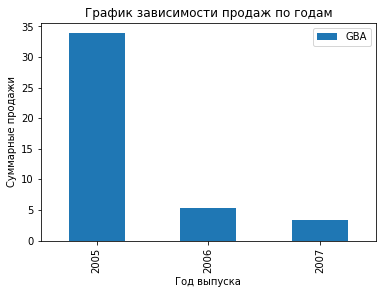

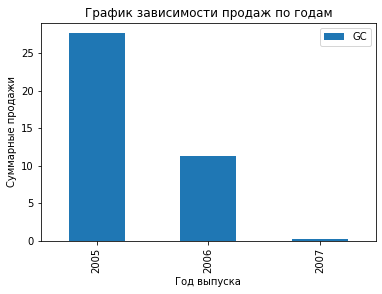

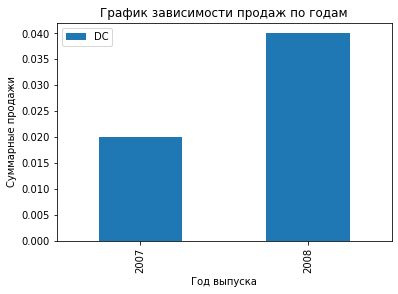

In [22]:
df_sorted_pl_list = df_sorted_pl1.index.to_list()
for i in df_sorted_pl_list:
    df_sorted_pl.loc[i].plot(y='total_sales', kind='bar', label=i)
    plt.title('График зависимости продаж по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи') 

plt.show()  

Максимально прибыльные платформы за период 2005-2016 года -это top5: X360, PS3, Wii, DS, PS2. При этом, что платформы за этот период принесли максимум прибыли не означает, что они по прежнему потенциальны. Как мы видим платформы достаточно быстро сменяют друг друга. Исходя из того, что данные за 2016 год неполные и из графиков распределения выше потенциально прибыльными могут быть следующие платформы top6: PS4, XOne, WiiU, 3DS, PSV, PС.

Топ-5(самые прибыльные) и топ-6(потенциальные в будущем) - списки получились неперекрываемыми, поскольку топ-6 еще не успели принести достаточно денег. Постоим график по продажам игр в разбивке по платформам для потенциальных игр.

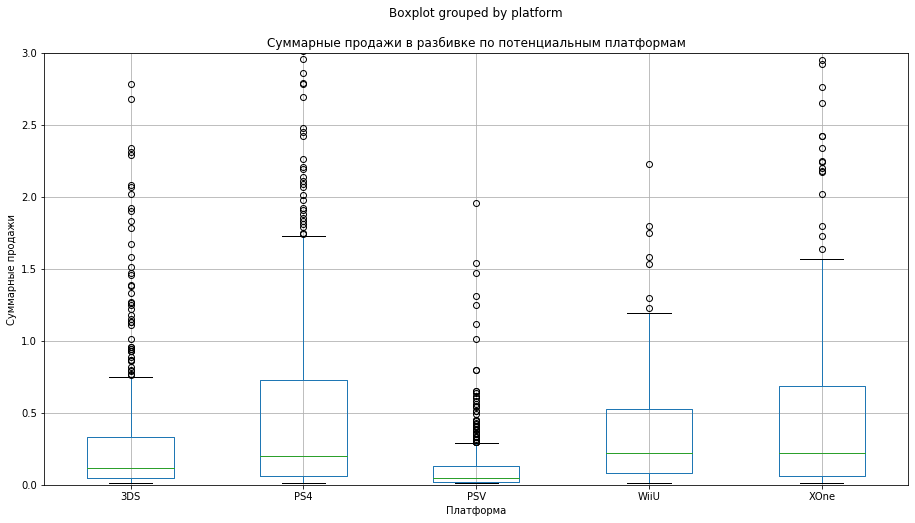

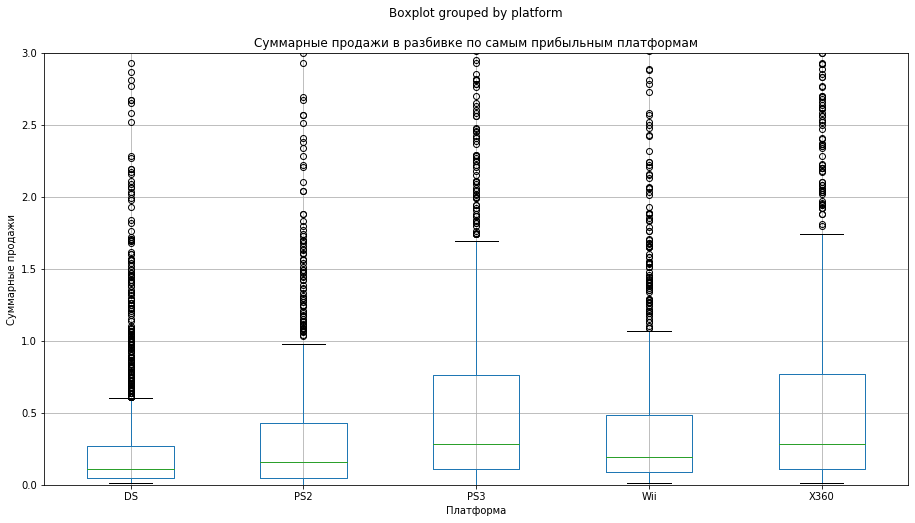

In [23]:
top6 = ['PS4', 'XOne', 'WiiU', '3DS', 'PSV', 'PС']
top5 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_top6 = df_sorted.query('platform in @top6')
df_top5 = df_sorted.query('platform in @top5')
df_top6.boxplot(by='platform', column='total_sales', figsize=(15,8))
plt.ylim(0, 3)
plt.title('Суммарные продажи в разбивке по потенциальным платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()
df_top5.boxplot(by='platform', column='total_sales', figsize=(15,8))
plt.ylim(0, 3)
plt.title('Суммарные продажи в разбивке по самым прибыльным платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

PS4 и XOne самые доходные из  выбранных потенциальных платформ, а в наиболее прибыльных большую выручку дает X360 и PS3.

Посмотрим, как влияют на продажи отзывы пользователей и критиков. Возьмем для расчетов популярную прибыльную платформу платформу PS2.

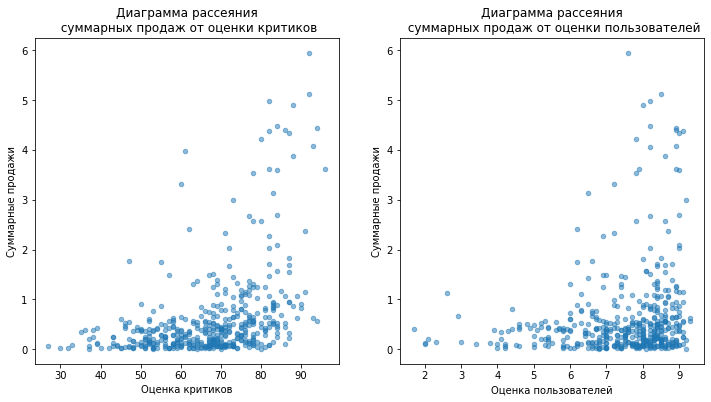

Коэффициент корреляции между отзывами критиков и продажами:      0.42
Коэффициент корреляции между отзывами пользователей и продажами: 0.19


In [24]:
a = df_top5.query('platform == "PS2"')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
a.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ax = ax[0])
ax[0].set_title('Диаграмма рассеяния\n суммарных продаж от оценки критиков')
ax[0].set(xlabel='Оценка критиков', ylabel='Суммарные продажи')
a.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ax = ax[1])
ax[1].set_title('Диаграмма рассеяния\n суммарных продаж от оценки пользователей')
ax[1].set(xlabel='Оценка пользователей', ylabel='Суммарные продажи')
plt.show()
print('Коэффициент корреляции между отзывами критиков и продажами:      {:.2f}'.format(a['critic_score'].corr(a['total_sales'])))
print('Коэффициент корреляции между отзывами пользователей и продажами: {:.2f}'.format(a['user_score'].corr(a['total_sales'])))

Исходя из диаграмм рассеяния и коэффициентов корреляции - есть слабая положительная зависимость между отзывами критиков и продажами платформы PS2, в то время как между отзывами пользователей и продажами связь явно менее существенна.
Напишем функцию, которая строит диаграмму рассеяния и считает зависимость для остальных прибыльных платформ.

In [25]:
def dependence(df, plat_name):
    print(70*'-')
    print('Платформа', plat_name)
    a = df.query('platform == @plat_name')
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    a.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ax = ax[0])
    ax[0].set_title('Диаграмма рассеяния\n суммарных продаж от оценки критиков')
    ax[0].set(xlabel='Оценка критиков', ylabel='Суммарные продажи')
    a.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ax = ax[1])
    ax[1].set_title('Диаграмма рассеяния\n суммарных продаж от оценки пользователей')
    ax[1].set(xlabel='Оценка пользователей', ylabel='Суммарные продажи')
    plt.show()
    print('Коэффициент корреляции между отзывами критиков и продажами:      {: .2f}'.format(a['critic_score'].corr(a['total_sales'])))
    print('Коэффициент корреляции между отзывами пользователей и продажами: {: .2f}'.format(a['user_score'].corr(a['total_sales'])))
    print()

----------------------------------------------------------------------
Платформа PS2


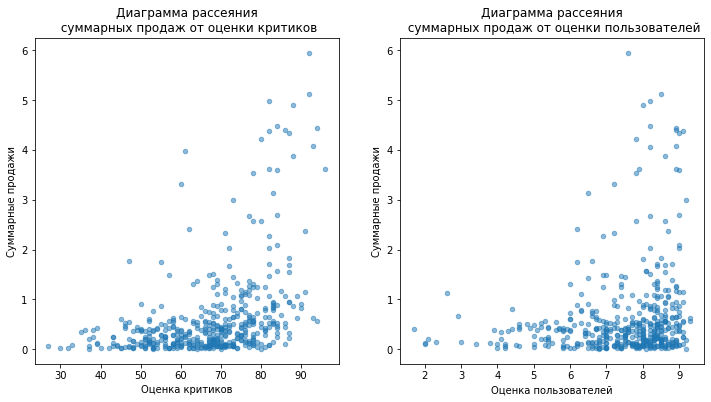

Коэффициент корреляции между отзывами критиков и продажами:       0.42
Коэффициент корреляции между отзывами пользователей и продажами:  0.19

----------------------------------------------------------------------
Платформа X360


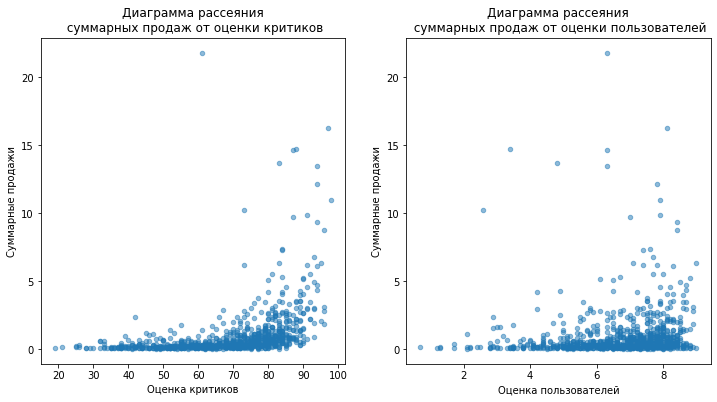

Коэффициент корреляции между отзывами критиков и продажами:       0.39
Коэффициент корреляции между отзывами пользователей и продажами:  0.11

----------------------------------------------------------------------
Платформа PS3


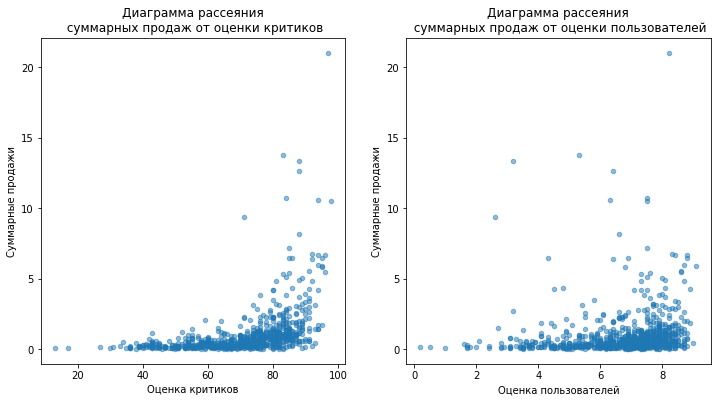

Коэффициент корреляции между отзывами критиков и продажами:       0.43
Коэффициент корреляции между отзывами пользователей и продажами:  0.13

----------------------------------------------------------------------
Платформа Wii


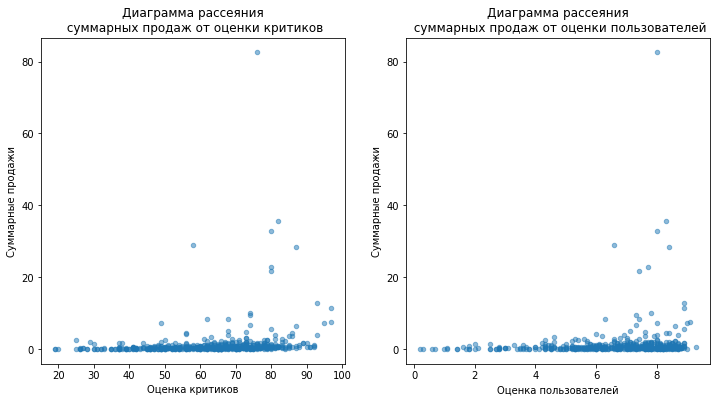

Коэффициент корреляции между отзывами критиков и продажами:       0.18
Коэффициент корреляции между отзывами пользователей и продажами:  0.11

----------------------------------------------------------------------
Платформа DS


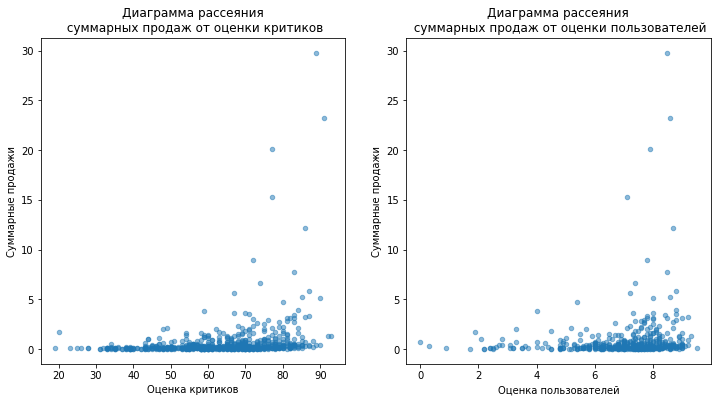

Коэффициент корреляции между отзывами критиков и продажами:       0.24
Коэффициент корреляции между отзывами пользователей и продажами:  0.13



In [26]:
for i in top5:
    dependence(df_top5, i)

У большинства платформ мы видим ту же картину, что и с PS2. Исключением является платформа Wii, на которой отзывы пользователей оказывают такое же вляние на продажи, как и отзывы критиков.

Посмотрим на распределение игр по жанрам на 5 самых прибыльных платформах и на всех платформах с 2005  года, выявим жанры с самыми высокими и низкими продажами.

In [27]:
b = df_top5['genre'].value_counts()
display(b)

Action          1443
Misc            1040
Sports           990
Adventure        587
Role-Playing     518
Shooter          511
Simulation       463
Racing           415
Puzzle           296
Fighting         296
Platform         243
Strategy         184
Name: genre, dtype: int64

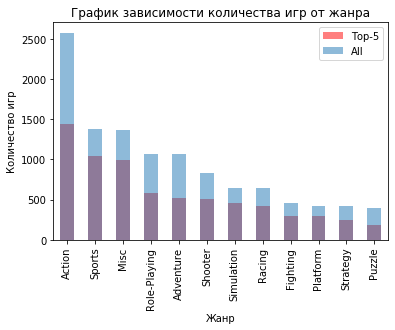

In [28]:
fix, ax = plt.subplots()
b.plot(kind='bar', ax=ax, alpha=0.5, color='red', legend=True, label='Top-5')

df_sorted['genre'].value_counts().plot(kind='bar', ax=ax, alpha=0.5, legend=True, label='All')
plt.title('График зависимости количества игр от жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Как видно, больше всего игр имеют жанр Action. Следующий за ним жанр Sports успупает по количеству игр в 1,5 раза.

In [29]:
df_top5.groupby(['genre']).agg({'total_sales': ['sum', 'max', 'min', 'mean']}).sort_values(('total_sales', 'sum'), ascending=False)

total_sales                       
                     sum    max   min      mean
genre                                          
Action            849.64  21.05  0.01  0.588801
Sports            688.87  82.54  0.00  0.695828
Misc              541.78  28.91  0.01  0.520942
Shooter           530.64  14.73  0.01  1.038434
Role-Playing      316.37  18.24  0.01  0.610753
Racing            259.88  35.52  0.00  0.626217
Platform          207.88  29.80  0.01  0.855473
Simulation        201.39  24.67  0.01  0.434968
Fighting          151.77  12.84  0.01  0.512736
Adventure         111.69   5.55  0.01  0.190273
Puzzle             96.97  15.28  0.01  0.327601
Strategy           38.83   2.62  0.01  0.211033

Самым прибыльным также является жанр Action, за ним Sports, а вот на третьем месте Shooter, хотя количество игр из графика выше по "стрелялкам" значительно меньше.

#### Вывод
Для последующего прогноза на 2017 год выбран период для анализа с 2005-2016 год, с связи с среднем врменем жизни платформ примерно 10 лет. Максимально прибыльные платформы за этот период X360, PS3, Wii, DS, PS2. При этом, что прибыльные платформы в прошлом не всегда являются потенциальными в будущем. Потенциально прибыльными мы определили следующие платформы PS4, XOne, WiiU, 3DS, PSV, PC. PS4 и XOne самые доходные из выбранных потенциальных платформ, а в наиболее прибыльных большую выручку дает X360 и PS3.
Практически для всех платформ существует слабая положительная зависимость между отзывами критиков и продажами платформы, связь между отзывами пользователей и продажами связь гораздо менее существенна. Исключением является платформа Wii, на которой отзывы пользователей оказывают такое же влияние на продажи, как и отзывы критиков.
Из жанров в абсолютные лидеры по прибыли числу игр выбивается Action, значит конкуренция в играх этого жанра высока, при не самом большом показателе средних продаж. Как вариант потенциальных жанров можно предложить Shooter и Platform, количество игр этих жанров не такое большое, при этом средние продажи их превышают продажи игр в жанре Action.

### Шаг 4. Портрет пользователя каждого региона.

Определим для пользователей каждого региона топ-5 самых популярных платформ. Напишем функцию, которая считает долю продаж, делает сортировку по убыванию и визуализирует данные на графике.

In [30]:
def users(df, x, y):
    print('Топ-5 ', x, ' в регионе ', y)
    top5 = df.pivot_table(index= [x], values =[y], aggfunc={sum})
    top5['fraction'] = top5[(y, 'sum')] /  top5[(y, 'sum')].sum()
    top_na = top5.sort_values((y, 'sum'), ascending=False).head()
    display(top_na)
    top_na.plot.pie(y=('fraction', ''), label='', autopct='%.1f%%')

Топ-5  platform  в регионе  na_sales


,na_sales,fraction
,sum,
platform,,
X360,595.74,0.226619
Wii,486.87,0.185205
PS3,390.13,0.148405
DS,371.98,0.141501
PS2,200.49,0.076266


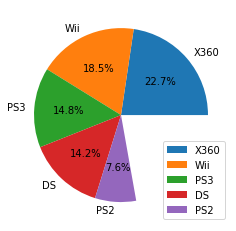

In [31]:
users(df_sorted, 'platform', 'na_sales')

5 самых популярных платформ пользователей региона Северная Америка совпадают с 5 топами в общей выборке, только меняются местами. Лидером является "родная" для Северной Америки X360. Доли по продажам между платформами отличаются не значительно. Непоказанные данные- это все остальные платформы вместе. Они для Америки занимают порядка 25%.

Топ-5  platform  в регионе  eu_sales


,eu_sales,fraction
,sum,
platform,,
PS3,327.21,0.202342
X360,268.32,0.165926
Wii,258.32,0.159742
DS,184.48,0.114080
PS4,141.09,0.087248


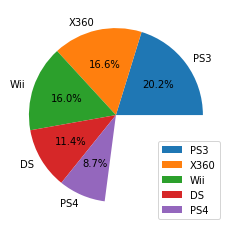

In [32]:
users(df_sorted, 'platform', 'eu_sales')

У европейских пользователей в топ-5 вместо PS2 выходит PS4, при этом PS3 является лидером по продажам в отличии от СА. Также порядка 30% занимают все остальные платформы.

Топ-5  platform  в регионе  jp_sales


,jp_sales,fraction
,sum,
platform,,
DS,171.35,0.278355
3DS,100.62,0.163456
PS3,79.41,0.129000
PSP,73.85,0.119968
Wii,68.28,0.110920


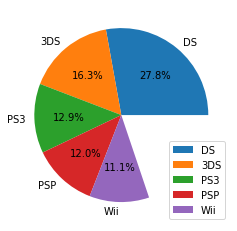

In [33]:
users(df_sorted, 'platform', 'jp_sales')

В Японии ситуация кардинально отличается. Лидером по доле является платформа DS, значительно обгоняя остальные. При этом все популярные здесь платформы являются японскими. Менее 25 % занимают все остальные платформы.

Посмотрим на топ-5 самых популярных жанров в разных регионах. Воспользуемся той же функцией `users`.

Топ-5  genre  в регионе  na_sales


,na_sales,fraction
,sum,
genre,,
Action,580.04,0.220647
Sports,432.70,0.164599
Shooter,400.96,0.152525
Misc,311.82,0.118616
Role-Playing,211.85,0.080587


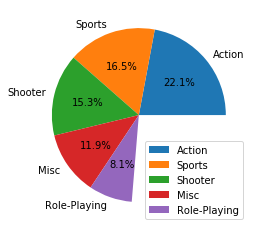

In [34]:
users(df_sorted, 'genre', 'na_sales')

Action, Sports и Shooter самые популярных жанры игр пользователей региона Северная Америка  также совпадают с общей выборкой, 10,7% Misc - все остальне жанры, на Role-Playing 8,2%.

Топ-5  genre  в регионе  eu_sales


,eu_sales,fraction
,sum,
genre,,
Action,372.58,0.230399
Sports,265.61,0.164250
Shooter,248.07,0.153403
Misc,167.09,0.103326
Racing,129.05,0.079803


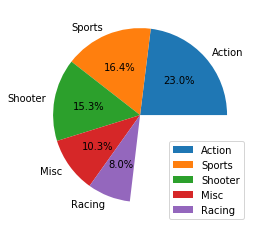

In [35]:
users(df_sorted, 'genre', 'eu_sales')

В Европе ситуация схожая, даже жанры близки по долям продаж, но вместо RPG пользователи из Европы предпочитают гонки Racing.

Топ-5  genre  в регионе  jp_sales


,jp_sales,fraction
,sum,
genre,,
Role-Playing,179.60,0.291757
Action,108.39,0.176078
Misc,72.49,0.117759
Sports,52.51,0.085302
Platform,36.32,0.059001


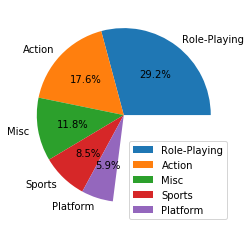

In [36]:
users(df_sorted, 'genre', 'jp_sales')

В регионе Япония на первом месте находится жанр RPG, который не встречался в Европе вообще, занимает 30% продаж всех жанров. И на 5 месте также "новый" по сравнению с другими регионами жанр Platform.

Посмотрим, как влияют рейтинги ESRB на продажи в регионах.

In [37]:
df_sorted['rating'].value_counts()

E       2673
T       2013
E10+    1379
M       1235
EC         8
AO         1
RP         1
Name: rating, dtype: int64

У нас 7 вариатов рейтингов: E - любой возраст, T - 13+, E10+ - от 10 лет, M - 17+, EC - для дошкольного возраста (в текущее время не используется), RP - рейтинг не назначен. Два последних отбросили, поскольку всего 1 игра с таким рейтингом. 
Воспользуемся функцией `users2`.

In [38]:
def users2(df, x, y):
    print('Топ-5 ', x, ' в регионе ', y)
    df[x].replace(to_replace=float('NaN'), value='no_rating', inplace=True)
    top5 = df.pivot_table(index= [x], values =[y], aggfunc={sum})
    top5['fraction'] = top5[(y, 'sum')] /  top5[(y, 'sum')].sum()
    top_na = top5.sort_values((y, 'sum'), ascending=False).head()
    display(top_na)
    top_na.plot.pie(y=('fraction', ''), label='', autopct='%.1f%%')

Топ-5  rating  в регионе  na_sales


,na_sales,fraction
,sum,
rating,,
E,873.10,0.332126
M,607.34,0.231031
T,479.08,0.182241
E10+,343.02,0.130484
no_rating,323.49,0.123055


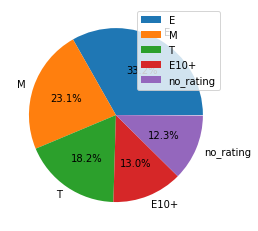

In [39]:
users2(df_sorted, 'rating', 'na_sales')

В Северной Америке игры с рейтингом E для любого возраста  имеют долю 33%, M - 23,1%, самые менее прибыльные игры  рейтинга E10+ от 10 лет. Сравнимую с E10+ имеют игры и без рейтинга, их доля 12,3%

Топ-5  rating  в регионе  eu_sales


,eu_sales,fraction
,sum,
rating,,
E,508.71,0.314580
M,414.11,0.256080
T,258.17,0.159649
no_rating,253.45,0.156730
E10+,181.92,0.112497


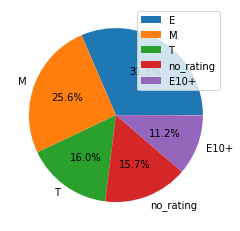

In [40]:
users2(df_sorted, 'rating', 'eu_sales')

В Европе ситуация схожа с регионом СА. Доля продаж игр без рейтинга составляет 15,7%.

Топ-5  rating  в регионе  jp_sales


,jp_sales,fraction
,sum,
rating,,
no_rating,291.65,0.473781
E,147.33,0.239335
T,91.32,0.148348
M,46.23,0.075100
E10+,39.05,0.063436


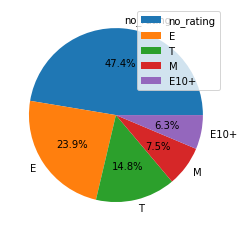

In [41]:
users2(df_sorted, 'rating', 'jp_sales')

В Японии ситуация отличается прямо кардинально. Игры без рейтинга по проадажам занимают самую большую долю в 47,4%. Продажи от остальных игр гораздо меньше.

#### Вывод
Портреты пользователей трех регионов отличаются. Европа и Северная Америка досточно близки между собой по топ-5 популярным платформам (X360 - самая популярная в Америке, в Европе на первое место выходит PS3, но общий рейтинг одинаков)  и жанрам (в Европе в топ- зашли гонки, а в Америке RPG), и влиянию рейтинга ESRB на продажи.  Япония же  кардинально отличается. В топе исключительно японские платформы, на первом месте жанр RPG, и почти 50% игр, приносящих  высокие продажи не имеет рейтинга. Связано, скорее всего с тем, что рейтинг ESRB - это американская система оценки игр. Игры в дуругих странах используют какие-то другие, свои собственные рейтинги и могут не иметь оценок по рейтингу ESRB.

### Шаг 5. Проверка гипотез.

Проверим нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза - средний пользовательский рейтинг одной из платформ отличаетмся от другой. Используем Т-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. 

Возьмем две выборки по нужным платформам, удалим в них пропуски перед проверкой гипотез.

In [42]:
xone = df_sorted.query('platform == "XOne"')['user_score'].dropna()
pc = df_sorted.query('platform == "PC"')['user_score'].dropna()

print('Значения для платформы XOne\n', xone.agg(['mean', 'median', 'std', 'var']))
print() 
print('Значения для платформы PC\n', pc.agg(['mean', 'median', 'std', 'var']))

Значения для платформы XOne
 mean      6.521429
median    6.800000
std       1.380941
var       1.906997
Name: user_score, dtype: float64

Значения для платформы PC
 mean      6.884938
median    7.300000
std       1.515767
var       2.297549
Name: user_score, dtype: float64


Параметр equal_var=True используется для теста 2 выборок c предположительно равными дисперсиями. В нашем случае значения дисперсий значительно отличаются поэтому используем equal_var=False в тесте Стьюдента.

In [43]:
alpha = 0.05

result = st.ttest_ind(xone, pc, equal_var=False)
print('р-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.002348015535956376
Отвергаем нулевую гипотезу


Следовательно, средние пользовательские рейтинги у платформ  Xbox One и PC отличаются. По вычислениям выше видно, что у Xbox One это значение 6,52, а у  PC оно равно 7.

Проверим нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различаются. Используем Т-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. 

In [44]:
action = df_sorted.query('genre == "Action"')['user_score'].dropna()
sports = df_sorted.query('genre == "Sports"')['user_score'].dropna()

print('Значения для жанра Action\n', action.agg(['mean', 'median', 'std', 'var']))
print() 
print('Значения для жанра Sports\n', sports.agg(['mean', 'median', 'std', 'var']))

Значения для жанра Action
 mean      6.947027
median    7.200000
std       1.366900
var       1.868416
Name: user_score, dtype: float64

Значения для жанра Sports
 mean      6.539498
median    6.900000
std       1.639980
var       2.689536
Name: user_score, dtype: float64


 Значения дисперсий значительно отличаются, поэтому используем equal_var=False в тесте Стьюдента.

In [45]:
alpha = 0.01

result = st.ttest_ind(action, sports, equal_var=False)
print('р-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 5.717661260563439e-09
Отвергаем нулевую гипотезу


Следовательно, средние пользовательские рейтинги у жанров Action и Sports одинаковые. По вычислениям выше видно, что Action средний рейтинг 7,0 и Sports имеет рейтинг 6,9.

#### Вывод
Проверили гипотезы, используя Т-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. Средние пользовательские рейтинги у платформ  Xbox One и PC отличаются.  Две разные платформы, каждая имеет своих пользователей. Средние пользовательские рейтинги у жанров Action и Sports одинаковые. Эти два жанра самые популярные и прибыльные в большинстве регионов, поэтому неудивительно, что эта гипотеза подтвердилась.

### Шаг 6. Общий вывод.
Проанализировали данные о продажах игр, жанры и платформы, оценки пользователей и экспертов. 

Скорректировали пропущенные значения, изменили названия столбцов, тип данных нескольких колонок для более быстрой и удобной обработки. Рассчитали необходимые для проекта параметры, в том числе суммарые продажи по всем регионам. 
Выбрали для анализа период с 2005 по 2016 год, исходя из среднего времени жизни популярных платформ 10 лет и быстрым их удодом с рынка.

Максимально прибыльные платформы за этот период были X360, PS3, Wii, DS, PS2. При этом потенциально прибыльными в 2017 году мы определили следующие платформы  PS4, XOne, WiiU, 3DS, PSV, PC. Практически для всех платформ существвует слабая положительная зависимость между отзывами критиков и продажами платформы, связь между отзывами пользователей и продажами связь гораздо менее существенна. Исключением является платформа Wii, на которой отзывы пользователей оказывают такое же влияние на продажи, как и отзывы критиков.

Из жанров в абсолютные лидеры по прибыли числу игр выбивается Action. За ним Sports, на третьем месте по прибыли жанр Shooter.
Однако, при этом как вариант потенциальных жанров в 2017 году можно предложить Shooter и Platform, количество игр этих жанров не такое большое, как на Action и Sports, при этом средние продажи гораздо выше.

Если портреты покупателей в регионах Северная Америка и Европа достаточно близки между собой по популярным платформам ( X360, Wii, PS3) и предпочитаемым жанрам (Action, Sports, Shooter, Misc) и влиянию рейтинга ESRB на продажи, то покупатели в Японии предпочитают исключительно японские платформы, на первом месте жанр RPG, и почти 50% игр, приносящих  высокие продажи не имеет оценку в рейтинге ESRB. Поэтому подходя к планированию 2017 года необходимо учесть региональные особенности потребителей, выбрать соответствующие платформы и жанры игр.